Question 6. #Solution


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)

data = pd.read_csv("./tsfel_data.csv")
X = data.drop("activity", axis=1)  # Drop the target column to get features
y = data["activity"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Linear regression": LinearRegression(),
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = np.round(model.predict(X_train)).astype(int)

    y_test_pred = np.round(model.predict(X_test)).astype(int)

    if i == 2:

        print(list(models.keys())[i])

        # for train set
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_r_squared = r2_score(y_train, y_train_pred)

        # for test set
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_r_squared = r2_score(y_test, y_test_pred)

        print("Model performance for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- MAE: {:.4f}".format(train_mae))
        print("- MSE: " + str(train_mse))
        print("- R_squared:" + str(train_r_squared))

        print("----------------------------------")

        print("Model performance for Test set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("- MAE:" + str(test_mae))
        print("- MSE:" + str(test_mse))
        print("- R_squared:" + str(test_r_squared))

    else:

        # Training set performance
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average="macro")
        model_train_precision = precision_score(
            y_train, y_train_pred, average="macro")
        model_train_recall = recall_score(
            y_train, y_train_pred, average="macro")
        # model_train_rocauc_score = roc_auc_score(y_train, y_train_pred,multi_class='ovr')

        # Test set performance
        model_test_accuracy = accuracy_score(
            y_test, y_test_pred)  # Calculate Accuracy
        model_test_f1 = f1_score(y_test, y_test_pred, average="macro")
        model_test_precision = precision_score(
            y_test, y_test_pred, average="macro")
        model_test_recall = recall_score(y_test, y_test_pred, average="macro")
        # model_test_rocauc_score = roc_auc_score(y_test, y_test_pred,multi_class='ovr') #Calculate Roc

        print(list(models.keys())[i])

        print("Model performance for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 score: " + str(model_train_f1))
        print("- Precision:" + str(model_train_precision))
        print("- Recall: " + str(model_train_recall))
        # print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print("----------------------------------")

        print("Model performance for Test set")
        print("- Accuracy:" + str(model_test_accuracy))
        print("- F1 score:" + str(model_test_f1))
        print("- Precision:" + str(model_test_precision))
        print("- Recall: " + str(model_test_recall))
        # print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print("=" * 35)
    print("\n")

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0
- Precision:1.0
- Recall: 1.0
----------------------------------
Model performance for Test set
- Accuracy:0.9156976744186046
- F1 score:0.9111401661160271
- Precision:0.9117086526950864
- Recall: 0.9112151513205381


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0
- Precision:1.0
- Recall: 1.0
----------------------------------
Model performance for Test set
- Accuracy:0.9665697674418605
- F1 score:0.967083564842719
- Precision:0.9685671058230448
- Recall: 0.9664298227200256


Linear regression
Model performance for Training set
- Accuracy: 0.7436
- MAE: 0.2639
- MSE: 0.28134747348721145
- R_squared:0.9068741160194662
----------------------------------
Model performance for Test set
- Accuracy: 0.7485
- MAE:0.27325581395348836
- MSE:0.32848837209302323
- R_squared:0.8938477461215595




Using linear regression for classification is not justified because it is used for predicting continuous values, not discrete class labels. Linear regression assumes a linear relationship between dependent and independent variables, which may not hold true for classification tasks. Classification requires discrete predictions, which linear regression does not naturally provide. It is better to use algorithms like decision trees or random forest designed specifically for classification.


Question 7. #Solution


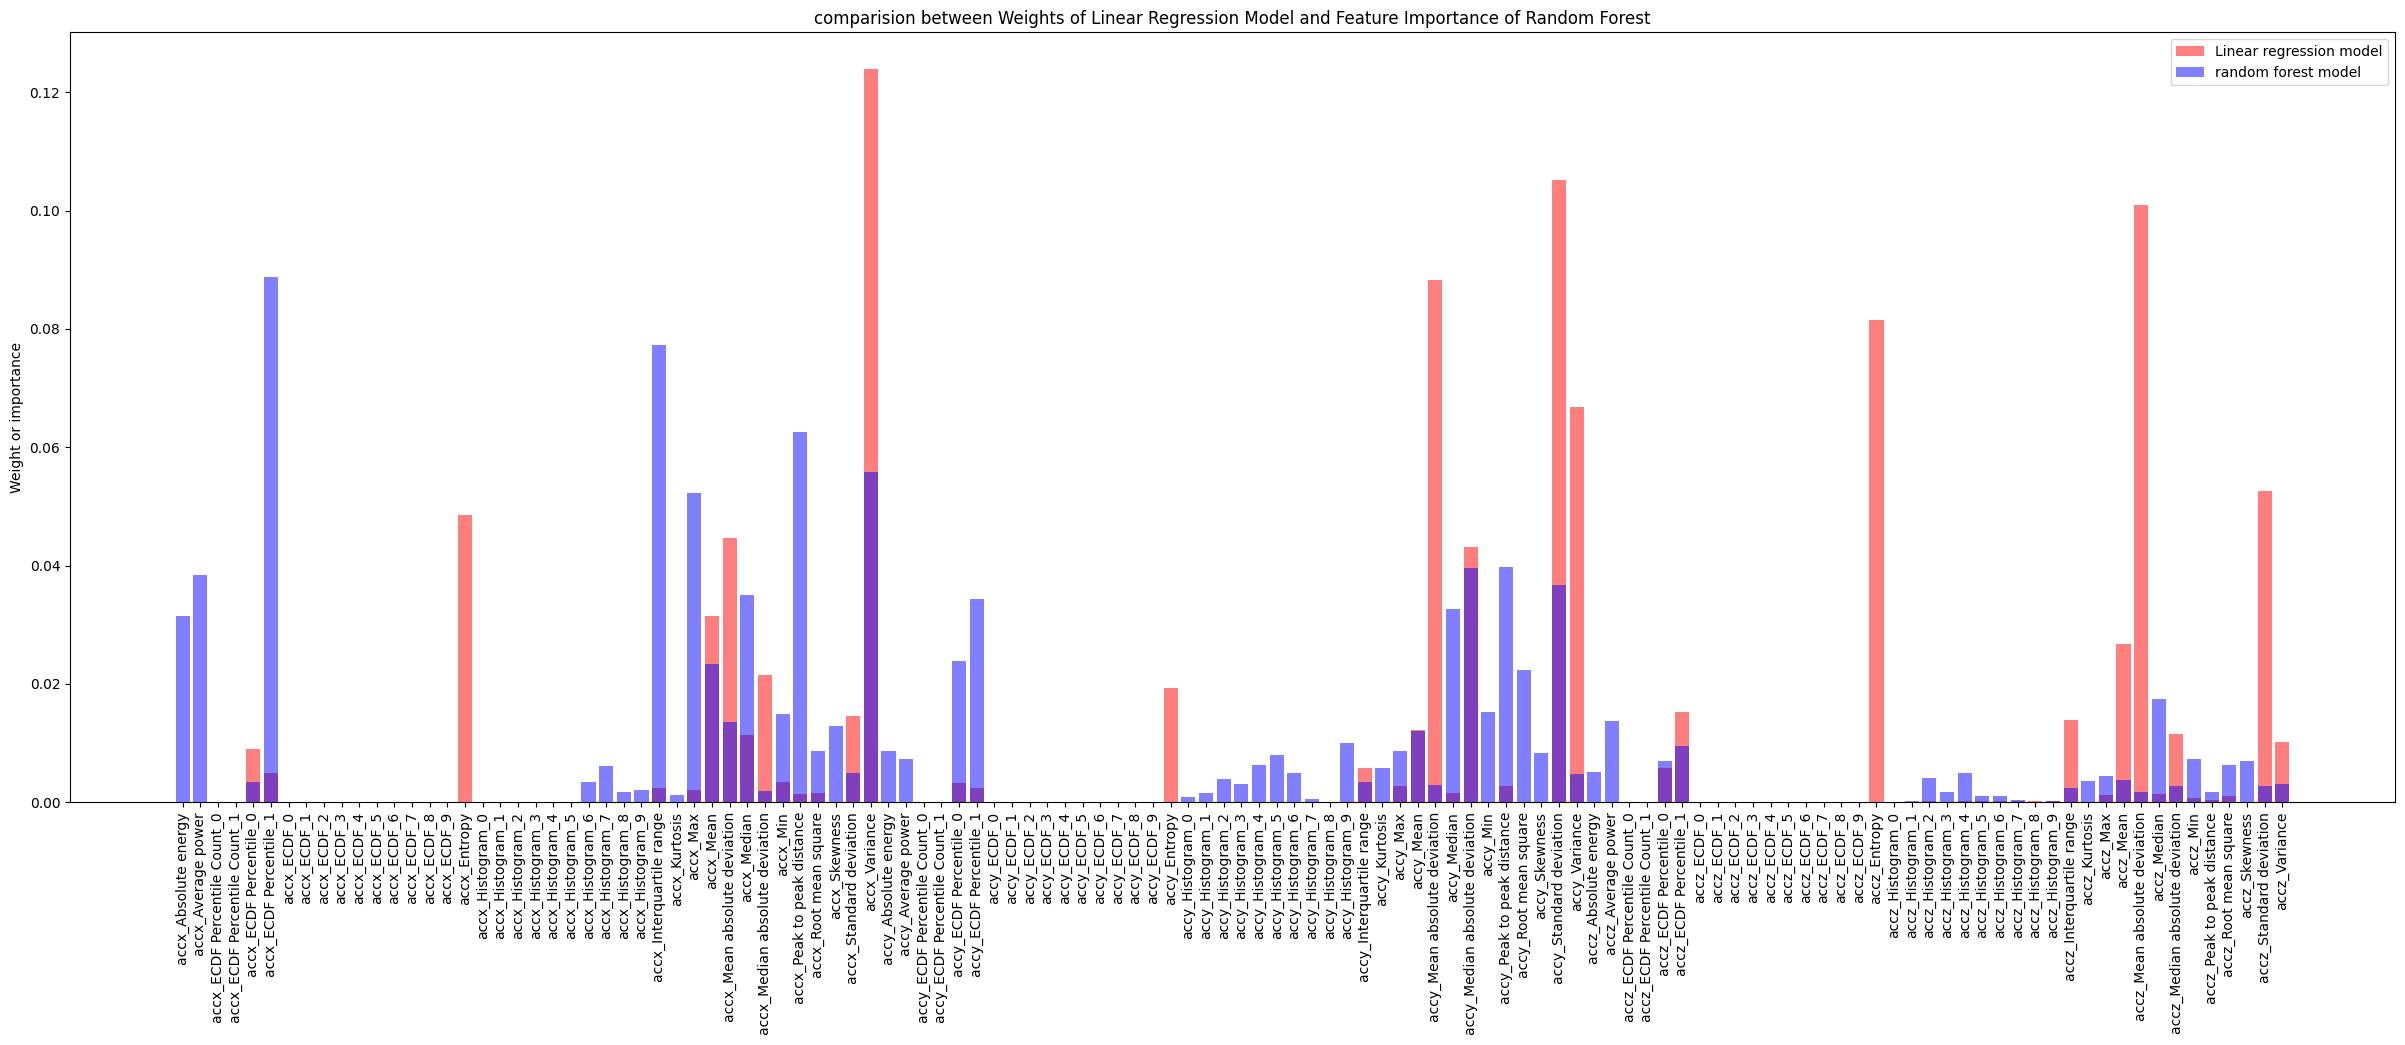

Top 10 features from linear regression model:
accx_Variance                     0.123924
accy_Standard deviation           0.105140
accz_Mean absolute deviation      0.100929
accy_Mean absolute deviation      0.088342
accz_Entropy                      0.081502
accy_Variance                     0.066775
accz_Standard deviation           0.052606
accx_Entropy                      0.048568
accx_Mean absolute deviation      0.044715
accy_Median absolute deviation    0.043223
dtype: float64

Top 10 features from random forest model:
accx_ECDF Percentile_1            0.088748
accx_Interquartile range          0.077330
accx_Peak to peak distance        0.062542
accx_Variance                     0.055865
accx_Max                          0.052240
accy_Peak to peak distance        0.039805
accy_Median absolute deviation    0.039569
accx_Average power                0.038435
accy_Standard deviation           0.036681
accx_Median                       0.034993
dtype: float64


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

try:
    from latexify import latexify, format_axes

    latexify(columns=2)
except:
    pass

# Get the absolute weights of the linear regression model
weights = np.abs(list(models.values())[2].coef_)

# Print or inspect the absolute weights
# print("Absolute Weights of Linear Regression Model:")
# print(weights)
# print("\n\n\n")


scaled_weights = weights / np.sum(weights)


rf = RandomForestClassifier(
    n_estimators=10, random_state=0, criterion="entropy", bootstrap=True
)
rf.fit(X, y)



sklearn_imp_forest = np.array(
    [x.tree_.compute_feature_importances() for x in rf.estimators_]
).mean(axis=0)
pd.Series(sklearn_imp_forest)
# print(pd.Series(sklearn_imp_forest))


Weight_plt = pd.Series(scaled_weights, index=X.columns)
fimp_plt = pd.Series(sklearn_imp_forest, X.columns)

# Create the figure and subplots
fig, pltt = plt.subplots(figsize=(30, 10))  # 2 rows, 1 column

# Plot the weights from the linear regression model
pltt.bar(
    Weight_plt.index,

    Weight_plt.values,
    color="red",
    alpha=0.5,
    label="Linear regression model",
)
pltt.set_ylabel("Weight or importance")
pltt.set_title(
    "comparision between Weights of Linear Regression Model and Feature Importance of Random Forest"
)


# Plot the feature importances from the random forest model
pltt.bar(
    fimp_plt.index,
    fimp_plt.values,
    color="blue",
    alpha=0.5,
    label="random forest model",
)
pltt.legend()
plt.xticks(rotation=90)
plt.show()


top10_linear = Weight_plt.sort_values(ascending=False).head(10)
top10_rf = fimp_plt.sort_values(ascending=False).head(10)

print("Top 10 features from linear regression model:")
print(top10_linear)

print("\nTop 10 features from random forest model:")
print(top10_rf)

The Linear Regression and Random Forest models prioritize features differently. Linear Regression gives weights based on the strength of the relationship with the target or dependent variable, while Random Forest calculates feature importances based on how much they contribute to reducing impurity in decision trees. The comparison reveals differences in prioritization, with Random Forest potentially capturing more complex relationships.
